# **Introduction**

## **Project Background**
Pens and Printers is a provider of high-quality stationery products. Recently, the company launched a new product line and tested three different sales strategies: Email, Call, and a combination of Email + Call.

## **Project Objectives**
This analysis aims to support the sales team by addressing the following key questions:

- **Customer Distribution:** How are customers distributed across the three sales methods?
- **Revenue Analysis:** What are the revenue distributions and trends for each sales method?
- **Long-Term Suitability:** Which sales method is the most viable for sustained long-term use?
- **Definition of a Metric for Monitoring Performance:** 
How should the business monitor its performance to achieve its objectives?
Estimate initial values for the proposed metric based on the current data.

By answering these questions, we will evaluate the performance of each sales strategy and provide actionable recommendations to optimize future sales efforts.

# **Data Loading and Initial Inspection**

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the Data
product_sales= pd.read_csv('product_sales.csv')

#Display the structure
print(product_sales.info())
print(product_sales.describe())
print(product_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None
               week       nb_sold  ...  years_as_customer  nb_site_visits
count  15000.000000  15000.000000  ...       15000.000000    15000.000000
mean       3.098267     10.084667  ...           4.965933       24.990867
std        1.656420      1.812213  ...           5.044952        3.500914
min        1.000000      7.000000  ...         

# **Data Cleaning and Validation**
- **Sales_method:** Fixed inconsistent capitalization and abbreviations, reducing 5 unique values to 3 standardized ones: "Email," "Call," and "Email + Call."
- **Revenue:** Filled 1,074 missing values with the mean revenue for each sales method.
- **Years_as_customer:** Replaced 2 invalid values (47 and 63) with the maximum valid value of 39.

## **Sales_method**

In [182]:
# Check unique values and their counts in a specific column
print(product_sales['sales_method'].value_counts())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [183]:
# Replace incorrect or inconsistent values in the 'sales_method' column
product_sales['sales_method'] = product_sales['sales_method'].replace({'email': 'Email', 
                                                       'em + call': 'Email + Call'})
# Verify the changes
print(product_sales['sales_method'].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


### **Handle Missing Values**

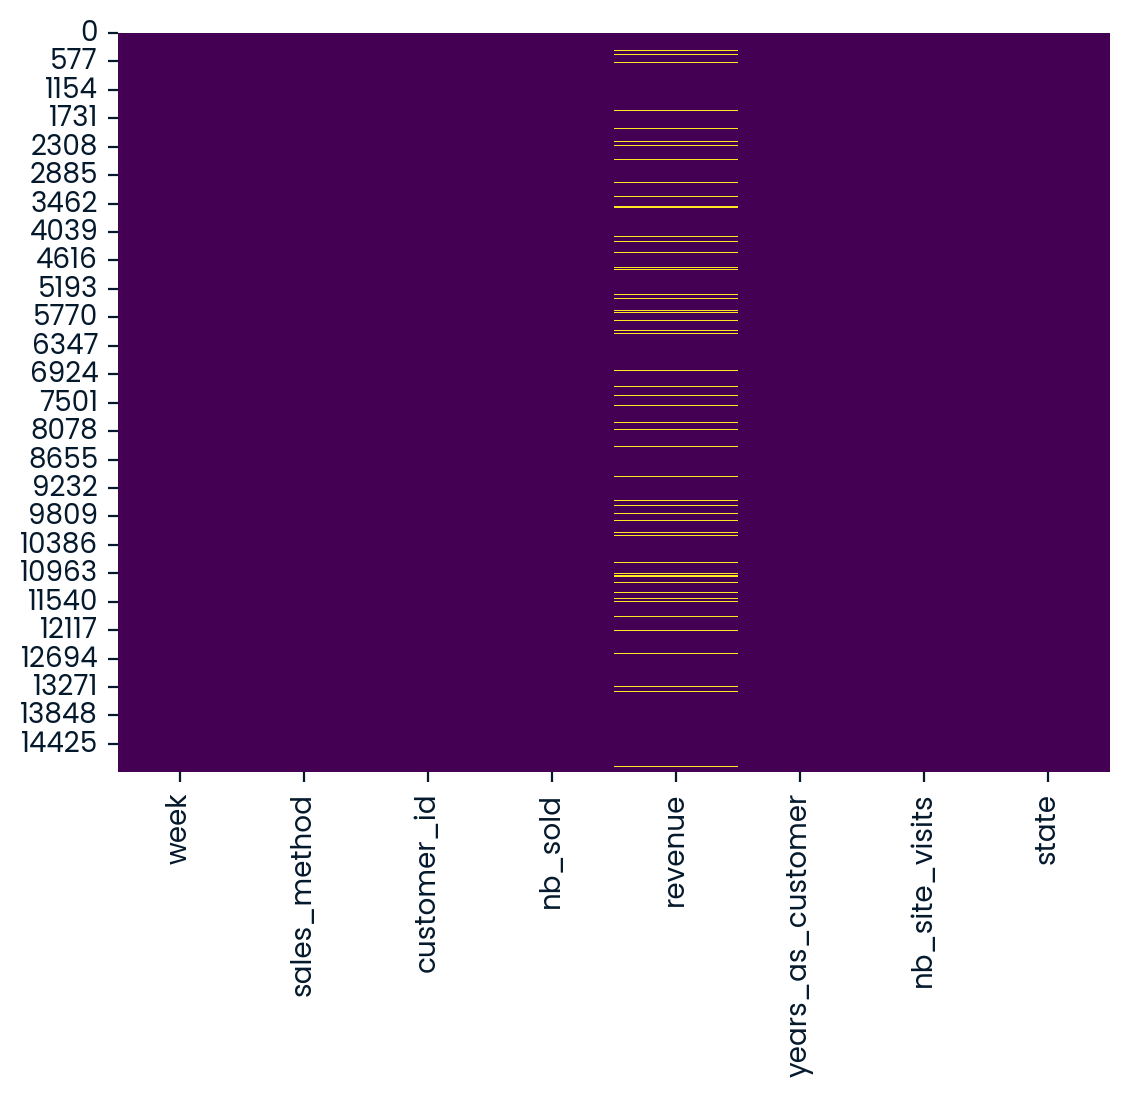

In [184]:
# Visualize missing values
sns.heatmap(product_sales.isnull(), cbar=False, cmap='viridis')
plt.show()

In [185]:
# Group the data by sales_method and count the number of missing values in the 'revenue' column
print(product_sales[product_sales['revenue'].isnull()].groupby('sales_method').size()) 

sales_method
Call            181
Email           544
Email + Call    349
dtype: int64


In [186]:
# Handle missing values (filling with mean of each methods)
product_sales['revenue'] = product_sales.groupby('sales_method')['revenue'].transform(lambda x: x.fillna(x.mean()))

# Verify that all missing values have been handled
print(product_sales['revenue'].isnull().sum())

0


## **Years_as_customer**

In [187]:
# Define the maximum valid value
max_valid_years = 39

# Filter rows where the value exceeds the maximum
invalid_rows = product_sales[product_sales['years_as_customer'] > max_valid_years]
print(invalid_rows)

# Replace values greater than 39 with the maximum valid value
product_sales['years_as_customer'] = product_sales['years_as_customer'].clip(upper=39)

# Verify the changes
print(product_sales['years_as_customer'].describe())

       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]
count    15000.000000
mean         4.963800
std          5.026295
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         39.000000
Name: years_as_customer, dtype: float64


# **Exploratory Data Analysis (EDA)**

## 1. How many customers were there for each approach?

In [188]:
#Analyze the distribution of customers across different sales methods
customers_by_sales_method = product_sales['sales_method'].value_counts()
print(customers_by_sales_method)

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


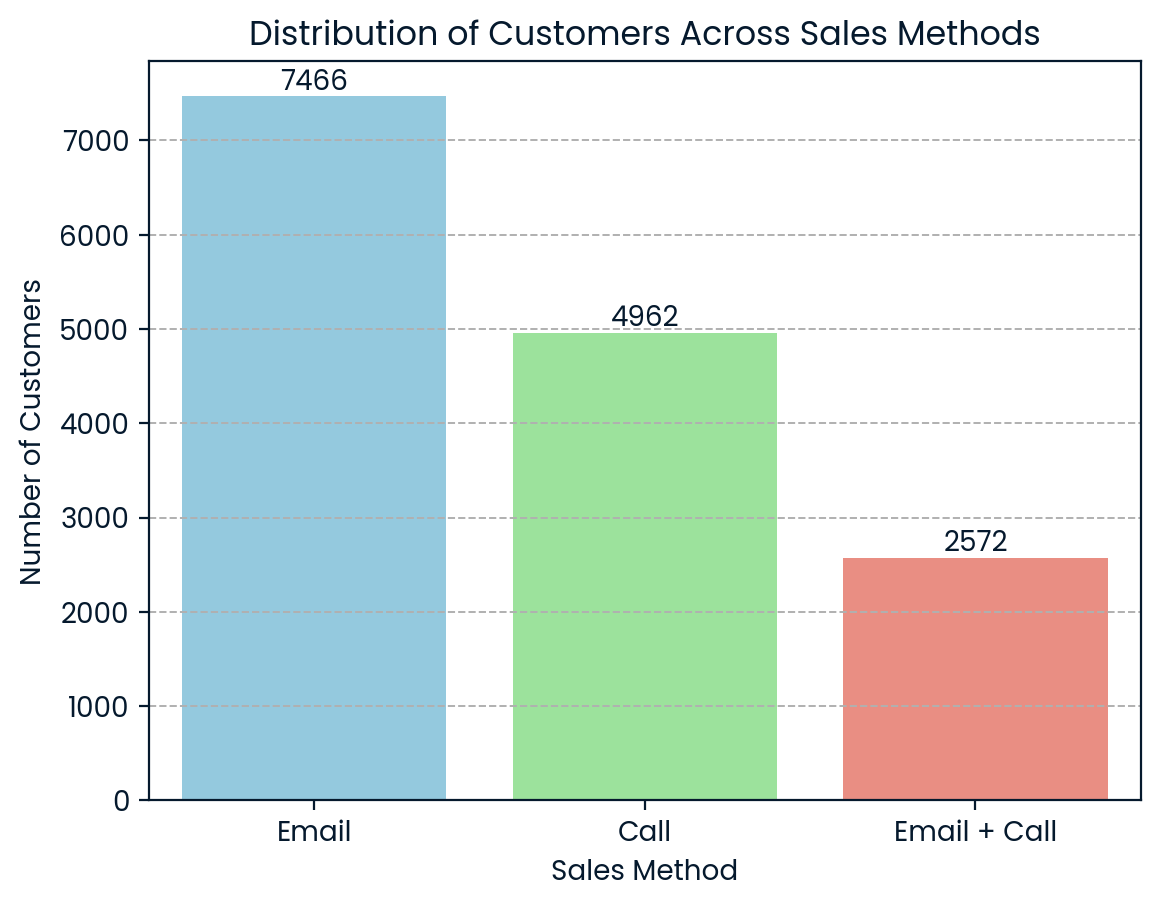

In [189]:
#Visualize the distribution using bar plot
customers_by_sales_method = product_sales['sales_method'].value_counts()
colors = ['skyblue', 'lightgreen', 'salmon']
ax = sns.barplot(x=customers_by_sales_method.index, y=customers_by_sales_method.values,palette=colors)
plt.title('Distribution of Customers Across Sales Methods')
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
# Add value labels to each bar
for i, v in enumerate(customers_by_sales_method.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

## 2. What is the spread of revenue overall and for each sales method?

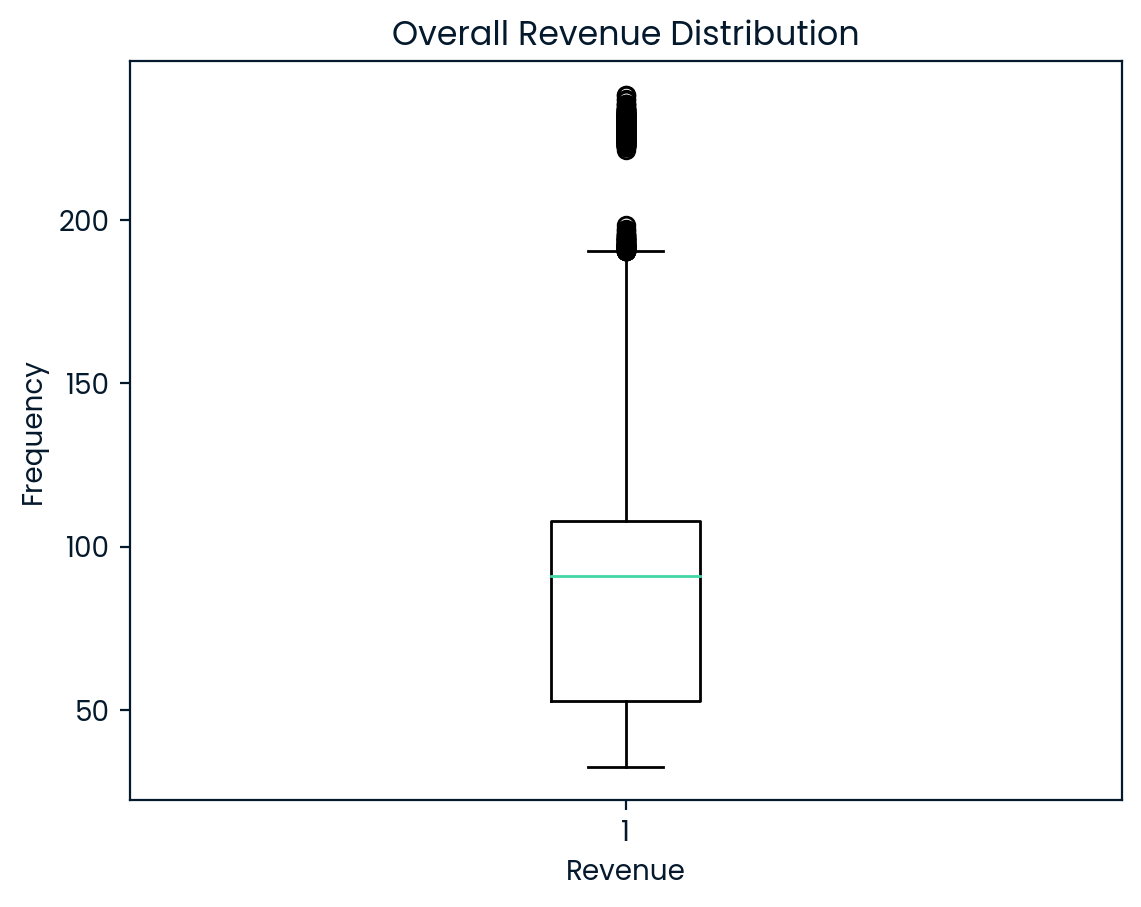

In [190]:
# Overall revenue distribution
plt.boxplot(product_sales['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Overall Revenue Distribution')
plt.show()

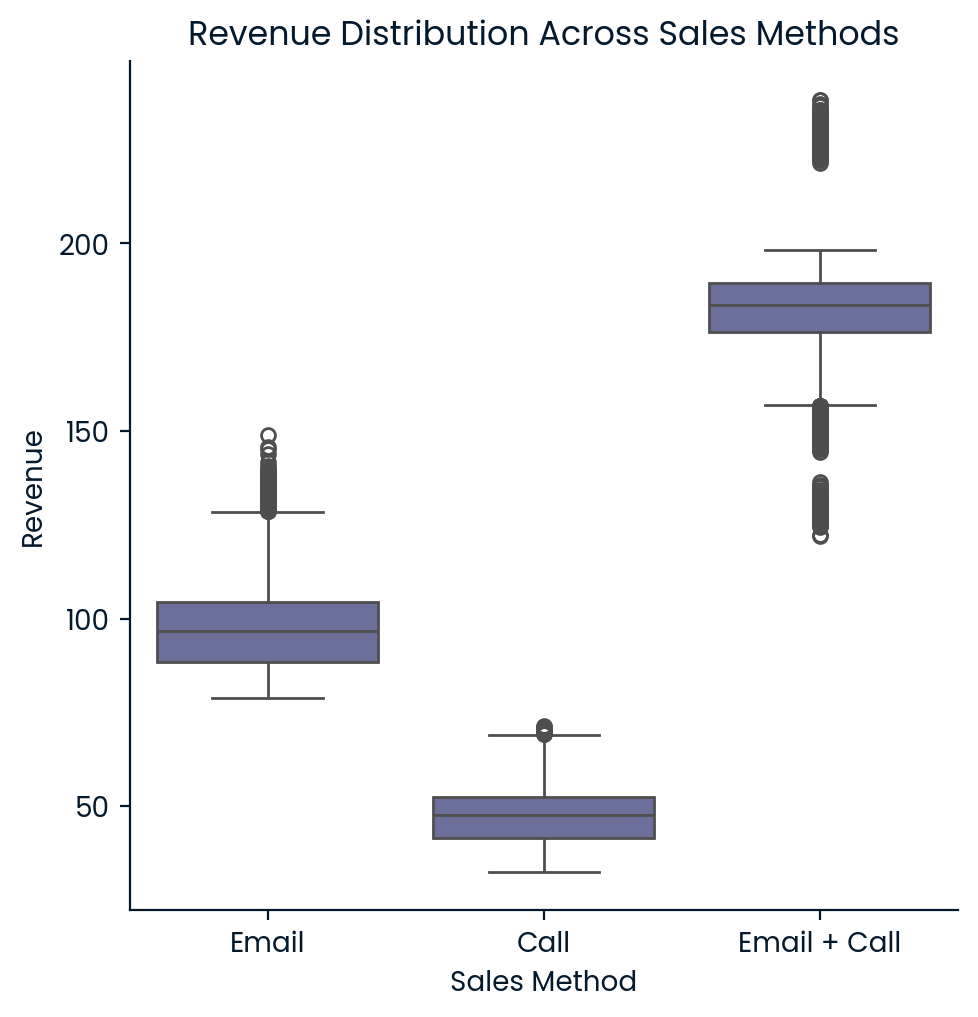

In [191]:
# Visualize the distribution of Revenue across different sales methods
sns.catplot(x='sales_method' , y='revenue', data=product_sales , kind='box',order=['Email', 'Call', 'Email + Call'],)
plt.title("Revenue Distribution Across Sales Methods")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.show()

## **3. Was there any difference in revenue over time for each of the methods?**

In [192]:
#Analyze revenue trends over time and compare performance across sales methods.
revenue_trends= product_sales.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
print(revenue_trends)

sales_method          Call          Email   Email + Call
week                                                    
1             27015.934407  248122.682313   20007.400954
2             35219.944012  148478.487577   31702.115744
3             37865.583880  107047.993157   55164.933140
4             51545.486149  116044.223157   89682.576419
5             55279.216281   80201.111052  147195.006815
6             29252.466808   25260.792947  128598.937094


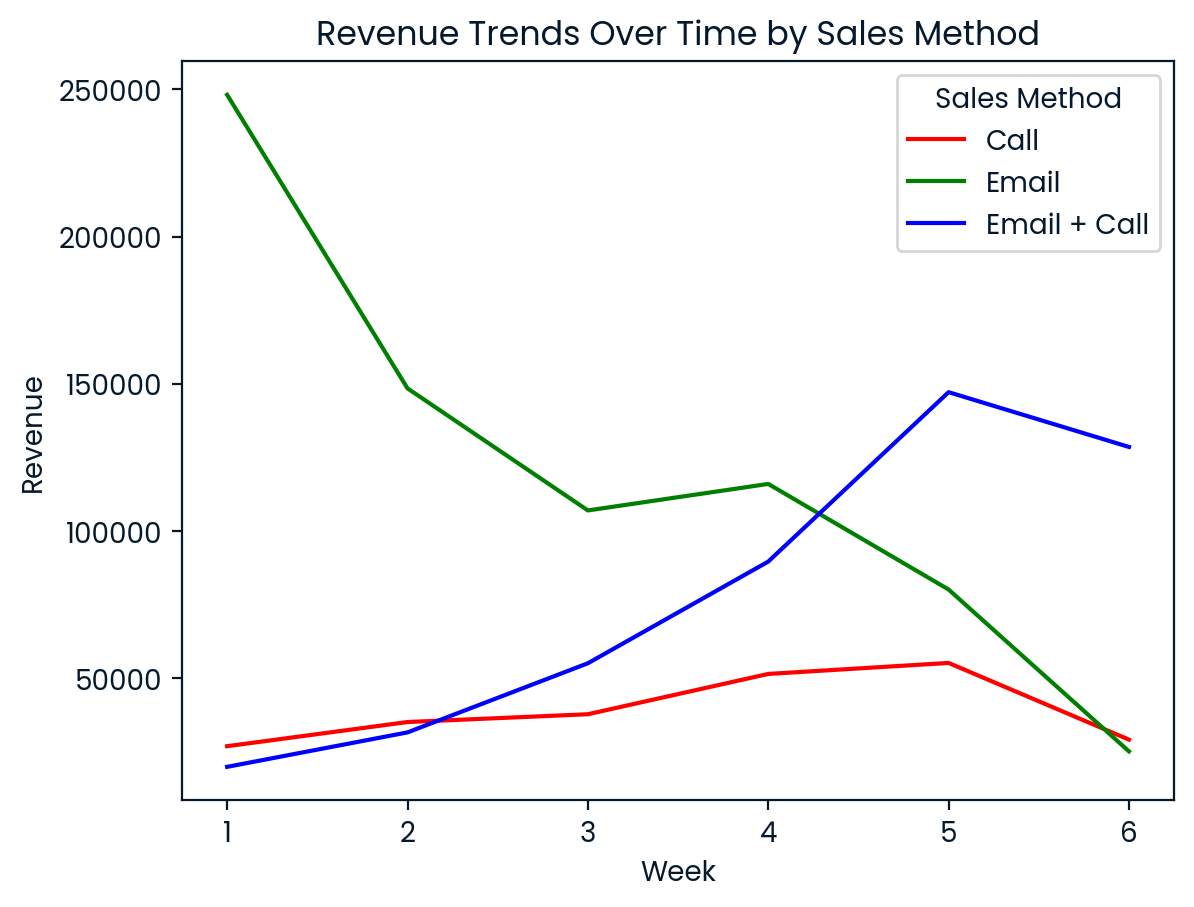

In [193]:
#Visualize the revenue trends of each sales methods 
sns.lineplot(data=revenue_trends,palette=['red', 'green','blue'],dashes=False )
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.title('Revenue Trends Over Time by Sales Method')
plt.show()

# **Exploratory Data Analysis (EDA) Summary**
## **Key Insights and Findings**

**Customer Distribution and Preferences:**
- Among the three sales methods, Email had the largest customer base (7466 customers). This indicates its widespread appeal and suitability for reaching a broad audience with minimal effort.
- In contrast, Call had the smallest customer base, likely due to its high time investment. This method may only appeal to specific customer segments requiring personalized attention.

**Revenue Potential:**
- Email + Call emerged as the most profitable method, with the highest median revenue and widest revenue range. This suggests that combining methods can create high-value transactions by leveraging both personalization and scalability.
- Call showed the lowest revenue potential, with a low median and minimal growth over time, making it the least efficient method in terms of revenue generation.

**Revenue Trends:**
- Email initially performed strongly but saw a significant decline in revenue over time. This indicates it may be best for short-term gains or initial engagement strategies.
- Email + Call demonstrated consistent growth and emerged as the most sustainable method for long-term revenue generation.
- Call showed stagnant trends with no significant improvement, suggesting it is not a scalable or sustainable strategy without significant changes.


# **Defining Business Metrics to Track Performance - Analyzing Sales Method Efficiency through ARCPSE**

ARCPSE (Average Revenue per Customer Sales Effort) is a metric designed to evaluate the efficiency of a sales method by measuring how much revenue is generated for each customer relative to the effort invested.

## **How Should the Business Monitor What They Want to Achieve?**
The business aims to understand the performance of each sales method in terms of revenue generated while considering the effort required for implementation. ARCPSE is an ideal metric for this purpose because:

**- Balanced Efficiency Measurement:**
ARCPSE incorporates both revenue generation (output) and sales effort (input) into a single value. This helps evaluate how efficiently each sales method converts effort into revenue.

**- Effort-Based Differentiation:**
Different sales methods require varying levels of effort (e.g., Email is less time-intensive than Call). ARCPSE accounts for this difference, providing a fair comparison of methods.

**- Actionable Insights:**
By identifying which methods have the highest ARCPSE, the business can prioritize those that deliver the most revenue per unit of effort. Low-performing methods can be improved, redesigned, or phased out.


## **1. Defining Sales Effort**
Based on the sales method descriptions:

- **Email:** Minimal effort for sending emails → 0.5 units.
- **Call:** Phone calls lasting ~30 minutes → 3 units.
- **Email + Call:** Email followed by a 10-minute call → 1 units.

In [194]:
# Define sales effort values
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

## **2. Calculate ARCPSE**

## **ARCPSE= Total Revenue each Method / (Count of customers * Sales Effort)**


In [195]:
# Add sales effort as a new column in the original data
product_sales['sales_effort'] = product_sales['sales_method'].map(sales_effort)

# Group by sales_method and calculate total revenue and total sales effort
grouped_data = product_sales.groupby('sales_method').agg({
    'revenue': 'sum',
    'customer_id': 'count',
    'sales_effort': 'first'  # Effort is the same for all rows in each method
}).reset_index()
# Calculate ARCPSE
grouped_data['ARCPSE'] = grouped_data['revenue'] / (grouped_data['customer_id'] * grouped_data['sales_effort'])

# Display the results
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


# **Findings**


## **Email:**

ARCPSE is the highest, indicating that this method provides the best returns with minimal effort.
Ideal for large-scale promotions.

## **Call:**
The lowest efficiency, showing it requires significant time investment but yields limited revenue.
Best suited for a small, high-value customer base.

## **Email + Call:**
ARCPSE is higher than Call and close to Email, demonstrating that it delivers better returns with slightly more effort.
Suitable for engaging potential customers who require more personalized support.







# **Recommendation**

**1. Focus on Email for Large-Scale Campaigns:**
- Invest more in email campaigns to maximize revenue generation at low cost.

**2. Refine the Call Strategy:**
- Use calls selectively for high-value or complex customer needs.
- Explore ways to reduce call times or increase effectiveness (e.g., training sales teams, using pre-screening).

**3. Optimize Email + Call:**
- Expand its use for mid-to-high-value customers to balance personalized support with cost-efficiency.

**4. Track ARCPSE Regularly:**
- Use ARCPSE as a key performance indicator (KPI) to monitor and refine sales strategies over time.

**5. Experiment and Reevaluate:**
- Conduct A/B tests or pilot programs to validate changes in sales strategies.
- Reassess sales effort assumptions and adjust the metric accordingly as more data becomes available.